# Exploratory Data Analysis and Visualizations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/processed/moods_2024_2025.csv')

In [3]:
df['full_date'] = pd.to_datetime(df['full_date'], errors='coerce')

In [4]:
df.head(2)

,full_date,weekday,time,mood,activities,mood_numeric,month,year,weekday_numeric,time_decimal,...,Sin dormir,Skin care,Sueño malo,Sueño medio,Sueño temprano,Tarea,Triste,Vacaciones,Viaje,Visita
0,2024-01-01,Monday,1:56 PM,Meh,"['Relajado', 'Aburrido', 'Sueño medio']",2,1,2024,0,13.93,...,0,0,0,1,0,0,0,0,0,0
1,2024-01-02,Tuesday,8:17 PM,Bien,"['Feliz', 'Relajado', 'Contento', 'Sueño medio...",3,1,2024,1,20.28,...,0,0,0,1,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 88 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   full_date                545 non-null    datetime64[ns]
 1   weekday                  545 non-null    object        
 2   time                     545 non-null    object        
 3   mood                     545 non-null    object        
 4   activities               545 non-null    object        
 5   mood_numeric             545 non-null    int64         
 6   month                    545 non-null    int64         
 7   year                     545 non-null    int64         
 8   weekday_numeric          545 non-null    int64         
 9   time_decimal             545 non-null    float64       
 10  sleep_level              545 non-null    object        
 11  sleep_level_numeric      545 non-null    int64         
 12  activities_count         545 non-nul

In [6]:
df.describe()

,full_date,mood_numeric,month,year,weekday_numeric,time_decimal,sleep_level_numeric,activities_count,emotions_count,health_count,...,Sin dormir,Skin care,Sueño malo,Sueño medio,Sueño temprano,Tarea,Triste,Vacaciones,Viaje,Visita
count,545,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,...,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,2024-11-21 16:20:15.412844032,2.783486,5.840367,2024.449541,3.012844,20.181431,2.328440,8.864220,3.897248,1.972477,...,0.012844,0.480734,0.135780,0.361468,0.003670,0.097248,0.040367,0.020183,0.033028,0.033028
min,2024-01-01 00:00:00,0.000000,1.000000,2024.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2024-05-16 00:00:00,3.000000,3.000000,2024.000000,1.000000,20.770000,2.000000,7.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2024-12-04 00:00:00,3.000000,5.000000,2024.000000,3.000000,22.750000,2.000000,9.000000,4.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2025-04-19 00:00:00,3.000000,9.000000,2025.000000,5.000000,23.080000,3.000000,11.000000,5.000000,3.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2025-12-20 00:00:00,4.000000,12.000000,2025.000000,6.000000,23.980000,4.000000,21.000000,10.000000,6.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,0.610044,3.573573,0.497904,2.001337,6.270957,0.759994,2.968571,1.487847,1.700231,...,0.112705,0.500088,0.342869,0.480867,0.060523,0.296567,0.196999,0.140757,0.178873,0.178873


In [7]:
df.describe(include=['O'])

,weekday,time,mood,activities,sleep_level
count,545,545,545,545,545
unique,7,256,5,537,5
top,Saturday,10:45 PM,Bien,"['Buen sueño', 'Relajado', 'Contento']",Buen sueño
freq,82,138,401,4,263


## Statistics

In [8]:
df.iloc[:, 12:22].describe()

,activities_count,emotions_count,health_count,productivity_count,places_count,tasks_count,school_count,positive_emotions_count,neutral_emotions_count,negative_emotions_count
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,8.864220,3.897248,1.972477,1.033028,0.242202,0.330275,0.370642,2.458716,0.407339,1.031193
std,2.968571,1.487847,1.700231,1.143561,0.510963,0.636729,0.692834,1.265580,0.577728,1.330130
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,9.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000
75%,11.000000,5.000000,3.000000,2.000000,0.000000,0.000000,1.000000,3.000000,1.000000,2.000000
max,21.000000,10.000000,6.000000,7.000000,3.000000,3.000000,4.000000,6.000000,2.000000,9.000000


In [9]:
print("Number of moods per month 2024")
df[df['year'] == 2024].groupby(['month', 'mood']).size().unstack(fill_value=0)

Number of moods per month 2024


mood,Bien,Horrible,Increíble,Mal,Meh
month,,,,,
1,26,0,0,1,4
2,20,1,0,3,5
3,26,0,0,1,4
4,25,0,0,0,5
5,22,1,1,1,6
6,22,0,0,0,3
8,0,0,1,0,0
9,18,0,3,0,9
10,25,0,0,1,5


In [10]:
print("Number of moods per month 2025")
df[df['year'] == 2025].groupby(['month', 'mood']).size().unstack(fill_value=0) 

Number of moods per month 2025


mood,Bien,Horrible,Increíble,Mal,Meh
month,,,,,
1,26,0,0,1,4
2,17,0,2,1,8
3,24,0,1,1,5
4,20,0,1,1,3
5,17,0,2,1,5
6,15,0,3,2,4
7,14,1,1,0,2
8,15,0,3,0,5
9,6,0,0,0,1


In [11]:
print("Number of moods per day")
df.groupby(['weekday', 'mood']).size().unstack(fill_value=0)

Number of moods per day


mood,Bien,Horrible,Increíble,Mal,Meh
weekday,,,,,
Friday,55,1,3,3,17
Monday,66,0,2,2,9
Saturday,55,1,11,3,12
Sunday,53,1,5,5,12
Thursday,60,0,2,1,14
Tuesday,56,0,1,1,17
Wednesday,56,0,2,5,14


In [12]:
print("Number of moods per every sleep level")
df.groupby(['sleep_level', 'mood']).size().unstack(fill_value=0)

Number of moods per every sleep level


mood,Bien,Horrible,Increíble,Mal,Meh
sleep_level,,,,,
Buen sueño,206,1,12,10,34
Sin dormir,3,0,1,1,2
Sueño malo,44,0,6,4,20
Sueño medio,146,2,7,5,39
Sueño temprano,2,0,0,0,0


In [13]:
print("Relation between mood and number of activities")
df.groupby(['activities_count', 'mood']).size().unstack(fill_value=0).sort_index(ascending=False)

Relation between mood and number of activities


mood,Bien,Horrible,Increíble,Mal,Meh
activities_count,,,,,
21,1,0,0,0,0
17,2,0,0,0,0
16,5,0,0,0,3
15,6,0,2,0,1
14,17,0,0,0,1
13,22,0,0,1,3
12,29,0,0,0,3
11,46,1,1,3,8
10,53,1,2,5,3


## Plots

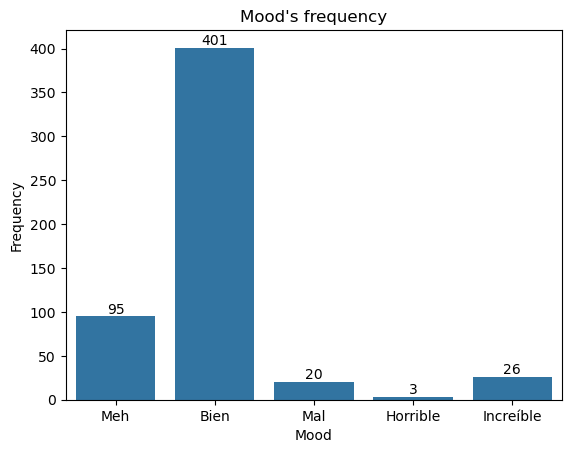

In [14]:
ax = sns.countplot(df, x="mood")
ax.bar_label(ax.containers[0])

plt.xlabel('Mood')
plt.ylabel('Frequency') 
plt.title('Mood\'s frequency')

plt.show()

In [15]:
activity_columns = df.iloc[:, 22:86]

activity_counts = activity_columns.sum().sort_values(ascending=False)
pd.set_option('display.max_rows', None) 

print(activity_counts)
pd.reset_option('display.max_rows')

Contento            456
Relajado            393
Buen sueño          263
Skin care           262
Agua                234
Comer sano          234
Sueño medio         197
Feliz               193
Ejercicio           184
Lectura             145
Cansado             133
Protector solar     119
Productivo          117
Ansioso             103
IA & Data           103
Motivado             91
Procrastinar         82
Enfocado             76
Estresado            75
Sueño malo           74
Ocupado              64
Emocionado           64
Cocinar              62
Proyecto             58
Salida               56
Tarea                53
Inglés               51
Estudio              51
Iniciar temprano     46
Limpiar              43
Aburrido             43
Desesperado          43
Hacer deberes        40
Clases completas     40
Clase                37
Inseguro             35
Algoritmos           35
Compras              35
Enfermo              34
Entretenimiento      33
Enojado              33
Decepcionado    

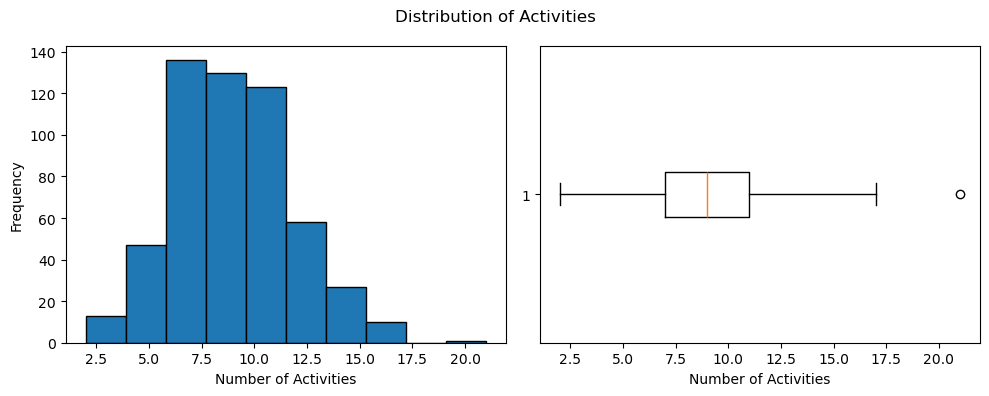

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].hist(df['activities_count'], edgecolor='black')
axes[0].set_xlabel('Number of Activities')
axes[0].set_ylabel('Frequency')

axes[1].boxplot(df['activities_count'], vert=False)
axes[1].set_xlabel('Number of Activities')

fig.suptitle('Distribution of Activities')

plt.tight_layout()
plt.show()

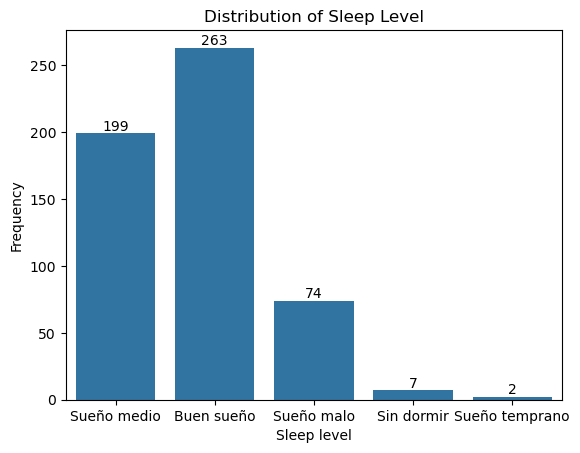

In [17]:
ax = sns.countplot(df, x="sleep_level")
ax.bar_label(ax.containers[0])

plt.xlabel('Sleep level')
plt.ylabel('Frequency') 
plt.title('Distribution of Sleep Level')

plt.show()

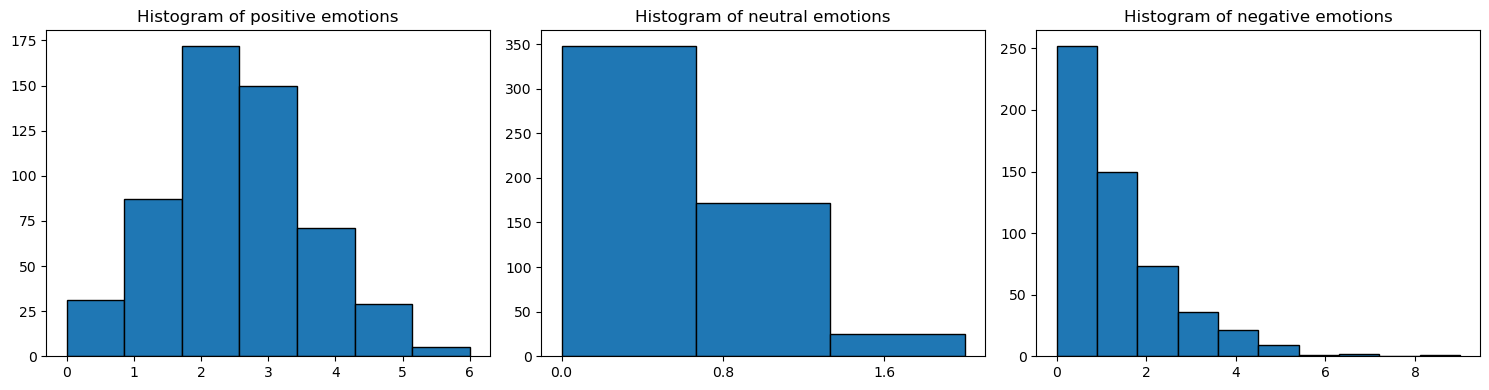

In [18]:
from matplotlib.ticker import MaxNLocator

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].hist(df['positive_emotions_count'], edgecolor='black', bins=7)
axes[0].set_title("Histogram of positive emotions")

axes[1].hist(df['neutral_emotions_count'], edgecolor='black', bins=3)
axes[1].xaxis.set_major_locator(MaxNLocator(3))
axes[1].set_title("Histogram of neutral emotions")

axes[2].hist(df['negative_emotions_count'], edgecolor='black')
axes[2].set_title("Histogram of negative emotions")

plt.tight_layout()
plt.show()

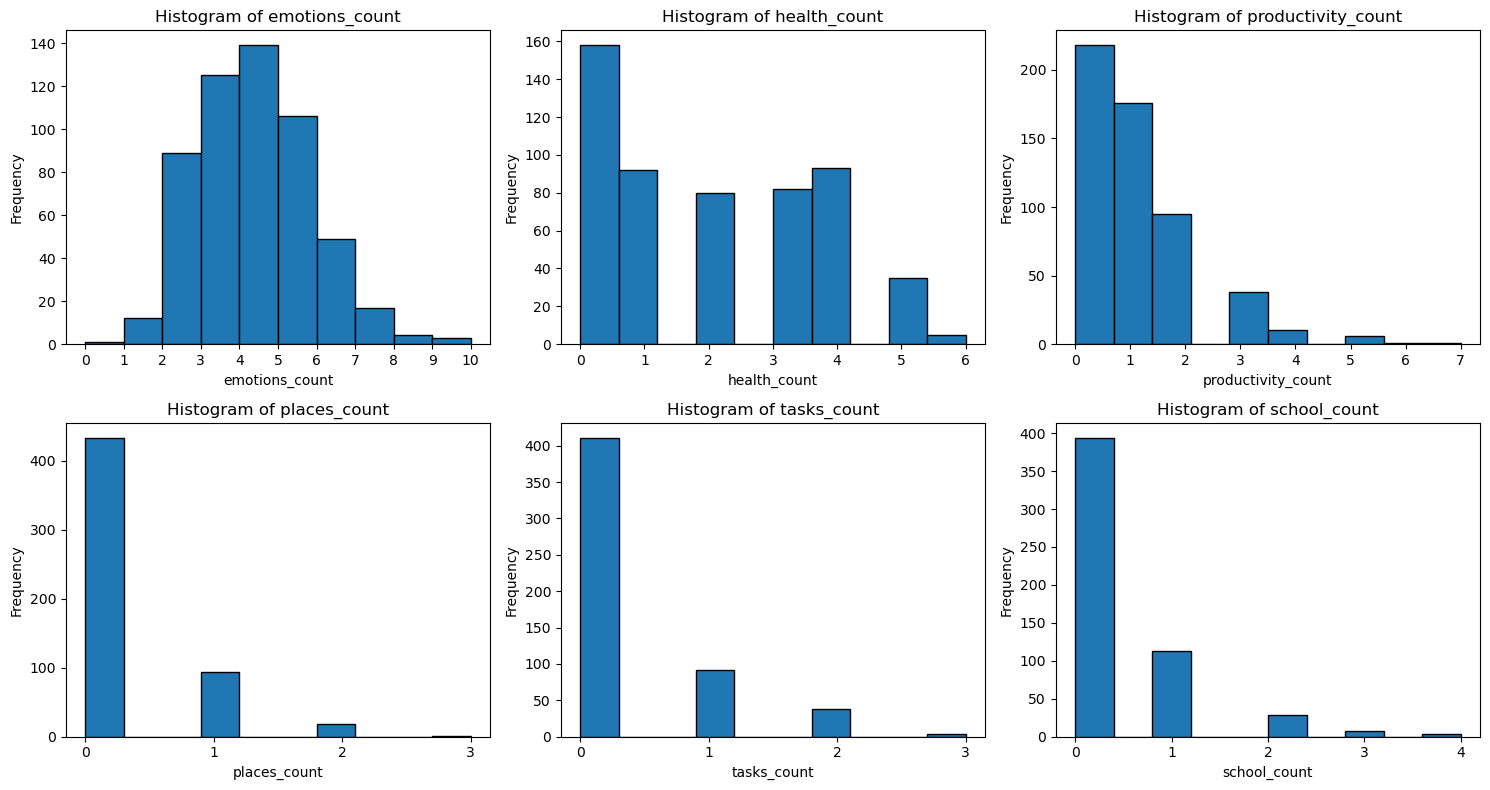

In [19]:
from matplotlib.ticker import MultipleLocator
from math import ceil

cols = ['emotions_count', 'health_count', 'productivity_count', 'places_count', 'tasks_count', 'school_count']

n_plots = len(cols)
    
# Calculate rows and columns
n_cols = min(3, n_plots)
n_rows = ceil(n_plots / n_cols)
    
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
    
# Ensure axes is an array
if n_plots == 1:
    axes = [axes]
else:
    axes = axes.flatten()

for i, col in enumerate(cols):
    axes[i].hist(df[col], edgecolor='black')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].xaxis.set_major_locator(MultipleLocator(1))
    
# Hide empty subplots
for i in range(n_plots, len(axes)):
    axes[i].set_visible(False)
    
plt.tight_layout()
plt.show()

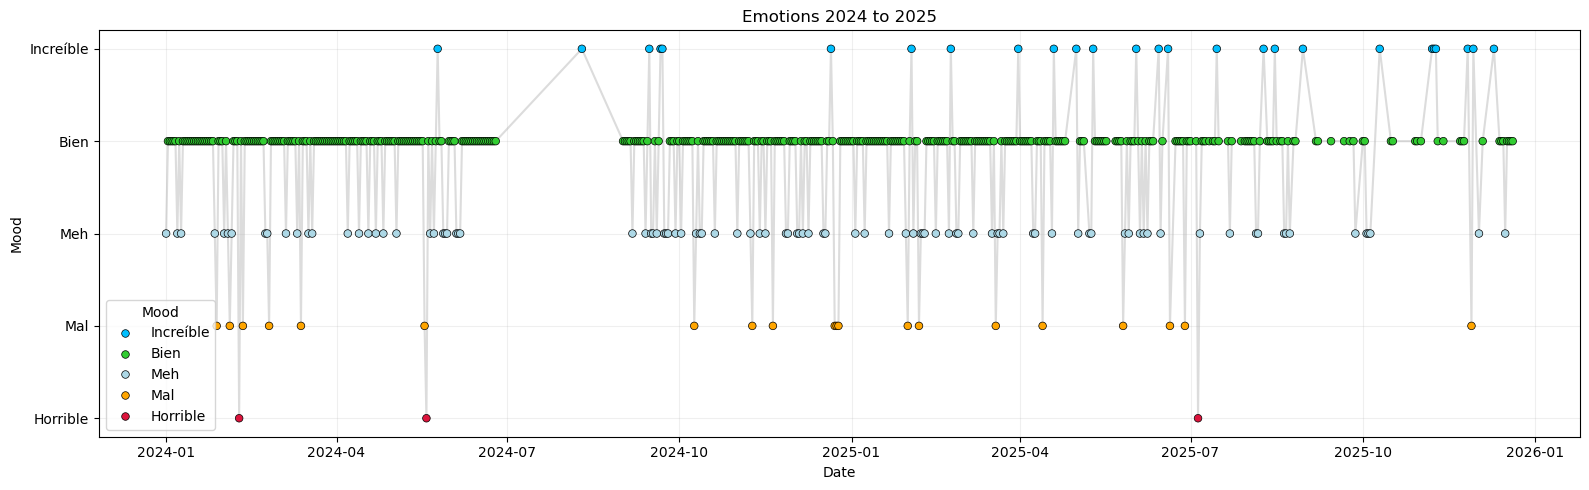

In [20]:
colors = {
    'Horrible': 'crimson',
    'Mal': 'orange',
    'Meh': 'lightblue',
    'Bien': 'limegreen',
    'Increíble': 'deepskyblue'
}

sorted_moods = ['Increíble', 'Bien', 'Meh', 'Mal', 'Horrible']

plt.figure(figsize=(16, 5))
plt.grid(True, alpha=0.2)

plt.xlabel("Date")
plt.ylabel("Mood")
plt.title("Emotions 2024 to 2025")

sns.lineplot(
    data=df,
    x="full_date", 
    y="mood_numeric",
    color="gainsboro",
    zorder=1,
    legend=False
)

sns.scatterplot(
    data=df,
    x="full_date", 
    y="mood_numeric",
    hue="mood",
    hue_order=sorted_moods,
    palette=colors,
    s=30,
    edgecolor="black",
    linewidth=0.5,
    zorder=2,
    legend="full"
)

plt.yticks(range(5), ['Horrible', 'Mal', 'Meh', 'Bien', 'Increíble'])

plt.legend(title="Mood", loc='best')

plt.tight_layout()
plt.show()

In [21]:
# Source - https://stackoverflow.com/questions/32485907/matplotlib-and-numpy-create-a-calendar-heatmap
# Posted by cbarrick, modified by community. See post 'Timeline' for change history
# Retrieved 2025-11-23, License - CC BY-SA 4.0

import matplotlib as mpl


DAYS = ['Sun', 'Mon', 'Tues', 'Wed', 'Thu', 'Fri', 'Sat']
MONTHS = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


def date_heatmap(series, start=None, end=None, mean=False, ax=None, **kwargs):
    '''Plot a calendar heatmap given a datetime series.

    Arguments:
        series (pd.Series):
            A series of numeric values with a datetime index. Values occurring
            on the same day are combined by sum.
        start (Any):
            The first day to be considered in the plot. The value can be
            anything accepted by :func:`pandas.to_datetime`. The default is the
            earliest date in the data.
        end (Any):
            The last day to be considered in the plot. The value can be
            anything accepted by :func:`pandas.to_datetime`. The default is the
            latest date in the data.
        mean (bool):
            Combine values occurring on the same day by mean instead of sum.
        ax (matplotlib.Axes or None):
            The axes on which to draw the heatmap. The default is the current
            axes in the :module:`~matplotlib.pyplot` API.
        **kwargs:
            Forwarded to :meth:`~matplotlib.Axes.pcolormesh` for drawing the
            heatmap.

    Returns:
        matplotlib.collections.Axes:
            The axes on which the heatmap was drawn. This is set as the current
            axes in the `~matplotlib.pyplot` API.
    '''
    # Combine values occurring on the same day.
    dates = series.index.floor('D')
    group = series.groupby(dates)
    series = group.mean() if mean else group.sum()

    # Parse start/end, defaulting to the min/max of the index.
    start = pd.to_datetime(start or series.index.min())
    end = pd.to_datetime(end or series.index.max())

    # We use [start, end) as a half-open interval below.
    end += np.timedelta64(1, 'D')

    # Get the previous/following Sunday to start/end.
    # Pandas and numpy day-of-week conventions are Monday=0 and Sunday=6.
    start_sun = start - np.timedelta64((start.dayofweek + 1) % 7, 'D')
    end_sun = end + np.timedelta64(7 - end.dayofweek - 1, 'D')

    # Create the heatmap and track ticks.
    num_weeks = (end_sun - start_sun).days // 7
    # heatmap = np.zeros((7, num_weeks))
    heatmap = np.full((7, num_weeks), np.nan)
    ticks = {}  # week number -> month name
    for week in range(num_weeks):
        for day in range(7):
            date = start_sun + np.timedelta64(7 * week + day, 'D')
            if date.day == 1:
                ticks[week] = MONTHS[date.month - 1]
            if date.dayofyear == 1:
                ticks[week] += f'\n{date.year}'
            if start <= date < end:
                # heatmap[day, week] = series.get(date, 0)
                heatmap[day, week] = series.get(date, np.nan)

    # Get the coordinates, offset by 0.5 to align the ticks.
    y = np.arange(8) - 0.5
    x = np.arange(num_weeks + 1) - 0.5

    # Plot the heatmap. Prefer pcolormesh over imshow so that the figure can be
    # vectorized when saved to a compatible format. We must invert the axis for
    # pcolormesh, but not for imshow, so that it reads top-bottom, left-right.
    ax = ax or plt.gca()
    mesh = ax.pcolormesh(x, y, heatmap, **kwargs)
    ax.invert_yaxis()

    # Set the ticks.
    ax.set_xticks(list(ticks.keys()))
    ax.set_xticklabels(list(ticks.values()))
    ax.set_yticks(np.arange(7))
    ax.set_yticklabels(DAYS)

    # Set the current image and axes in the pyplot API.
    plt.sca(ax)
    plt.sci(mesh)

    return ax

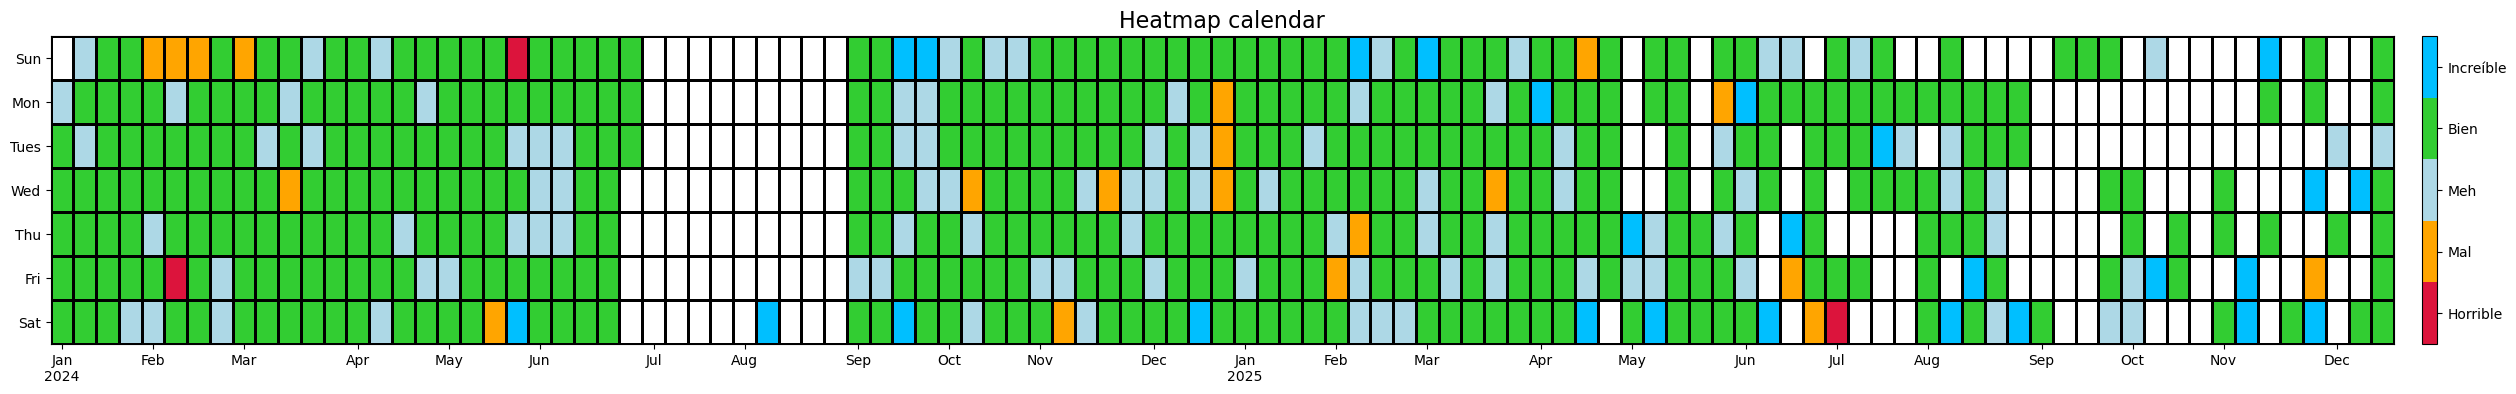

In [23]:
from matplotlib.colors import ListedColormap

series_data = df.set_index('full_date')['mood_numeric']

# Customized colors
colors = ['crimson', 'orange', 'lightblue', 'limegreen', 'deepskyblue']
my_cmap = ListedColormap(colors)

plt.figure(figsize=(36, 4))

ax = date_heatmap(
    series_data, 
    cmap=my_cmap,
    edgecolor='black',
    linewidth=0.8,
    mean=True
)

plt.clim(-0.5, 4.5) 
cbar = plt.colorbar(ticks=range(5), pad=0.01)
cbar.ax.set_yticklabels(['Horrible', 'Mal', 'Meh', 'Bien', 'Increíble'])

plt.title("Heatmap calendar", fontsize=16)
plt.show()

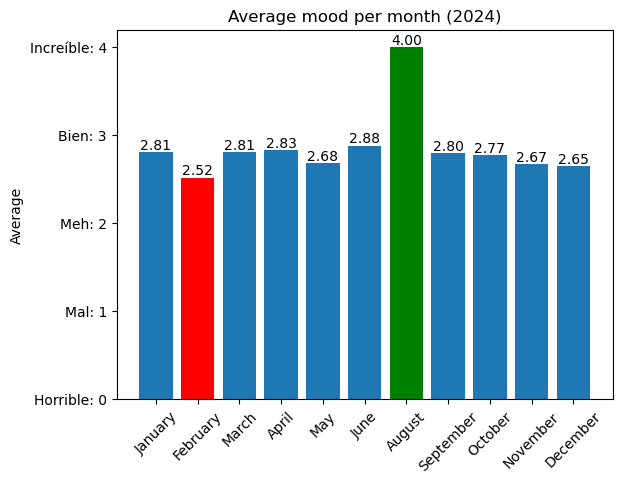

In [24]:
import calendar

mean_month = df[df['year'] == 2024].groupby('month')['mood_numeric'].mean()

max_value = mean_month.max()
min_value = mean_month.min()
max_index = mean_month.idxmax()
min_index = mean_month.idxmin()

colors = ['green' if i == max_index else 'red' if i == min_index else 'C0' for i in mean_month.index]

bars = plt.bar([calendar.month_name[i].capitalize() for i in mean_month.index], mean_month.values, color=colors)

plt.bar_label(bars, labels=[f'{val:.2f}' for val in mean_month.values])

plt.ylabel('Average')
plt.title('Average mood per month (2024)')
plt.yticks(range(5), ['Horrible: 0', 'Mal: 1', 'Meh: 2', 'Bien: 3', 'Increíble: 4'])
plt.xticks(rotation=45)

plt.show()

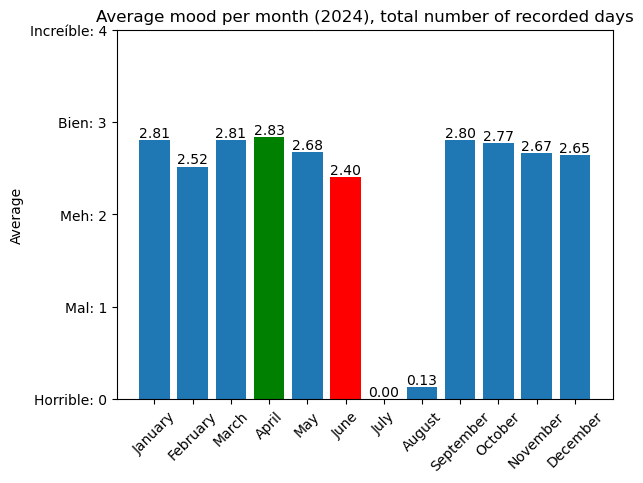

In [25]:
# Average mood per month (2024), based on the total number of recorded days
size_month = pd.Series({1: 31, 2: 29, 3: 31, 4: 30, 5: 31, 6: 30, 7: 31, 8: 31, 9: 30, 10: 31, 11: 30, 12: 31})

sum_month = df[df['year'] == 2024].groupby('month')['mood_numeric'].sum()
    
mean_month = sum_month / size_month
mean_month = mean_month.fillna(0)
max_value = mean_month.max()
max_index = mean_month.idxmax()

colors = ['green' if i == max_index else 'red' if i == 6 else 'C0' for i in mean_month.index]

bars = plt.bar([calendar.month_name[i].capitalize() for i in mean_month.index], mean_month.values, color=colors)

plt.bar_label(bars, labels=[f'{val:.2f}' for val in mean_month.values])

plt.ylabel('Average')
plt.title('Average mood per month (2024), total number of recorded days')
plt.yticks(range(5), ['Horrible: 0', 'Mal: 1', 'Meh: 2', 'Bien: 3', 'Increíble: 4'])
plt.xticks(rotation=45)
    
plt.show()

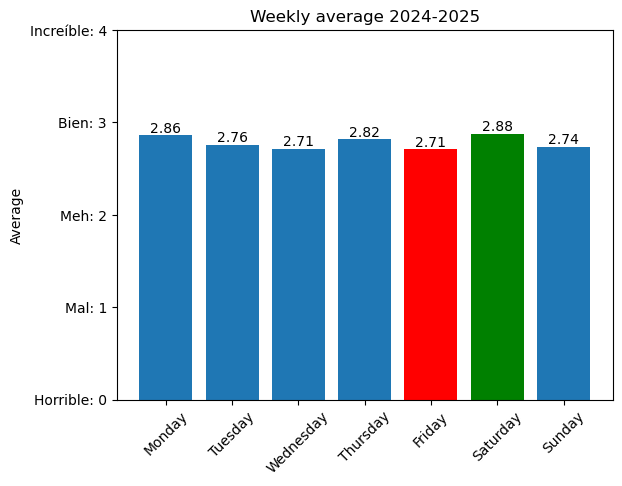

In [27]:
mean_weekday = df.groupby('weekday')['mood_numeric'].mean()
mean_weekday = mean_weekday.reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

max_value = mean_weekday.max()
min_value = mean_weekday.min()
max_index = mean_weekday.idxmax()
min_index = mean_weekday.idxmin()
    
colors = ['green' if i == max_index else 'red' if i == min_index else 'C0' for i in mean_weekday.index]
bars = plt.bar(mean_weekday.index, mean_weekday.values, color=colors)
plt.bar_label(bars, labels=[f'{val:.2f}' for val in mean_weekday.values])

plt.ylabel('Average')
plt.title('Weekly average 2024-2025')
plt.xticks(rotation=45)
plt.yticks(range(5), ['Horrible: 0', 'Mal: 1', 'Meh: 2', 'Bien: 3', 'Increíble: 4'])
    
plt.show()

## Respuesta a preguntas específicas

### 1. Cadenas de Markov
Probabilidad del mood del siguiente día 

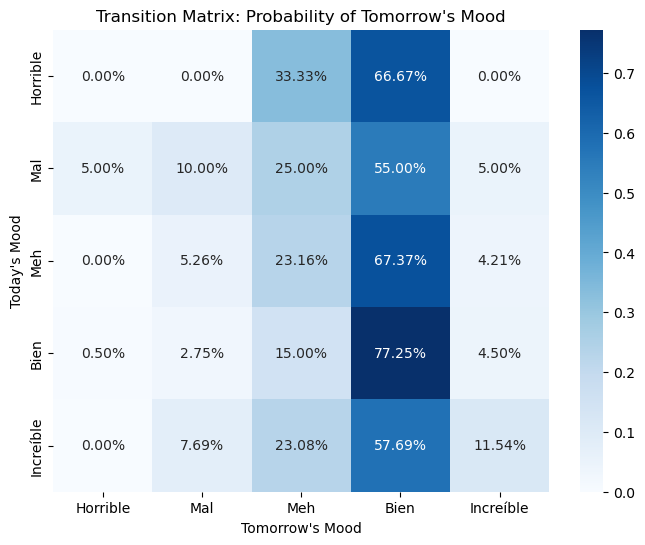

In [28]:
# Create a column for tomorrow's mood
df['next_day_mood'] = df['mood'].shift(-1)

# Crosstab normalized by row (index) gives probabilities
transition_matrix = pd.crosstab(
    df['mood'], 
    df['next_day_mood'], 
    normalize='index' # This turns counts into probabilities (0-1)
)

# Reorder for logic
order = ['Horrible', 'Mal', 'Meh', 'Bien', 'Increíble']
transition_matrix = transition_matrix.reindex(index=order, columns=order)

plt.figure(figsize=(8, 6))

sns.heatmap(transition_matrix, annot=True, fmt=".2%", cmap="Blues")

plt.title("Transition Matrix: Probability of Tomorrow's Mood")
plt.ylabel("Today's Mood")
plt.xlabel("Tomorrow's Mood")

plt.show()

### 2. Índice de volatilidad
¿Qué tan estable he sido emocionalmente últimamente?

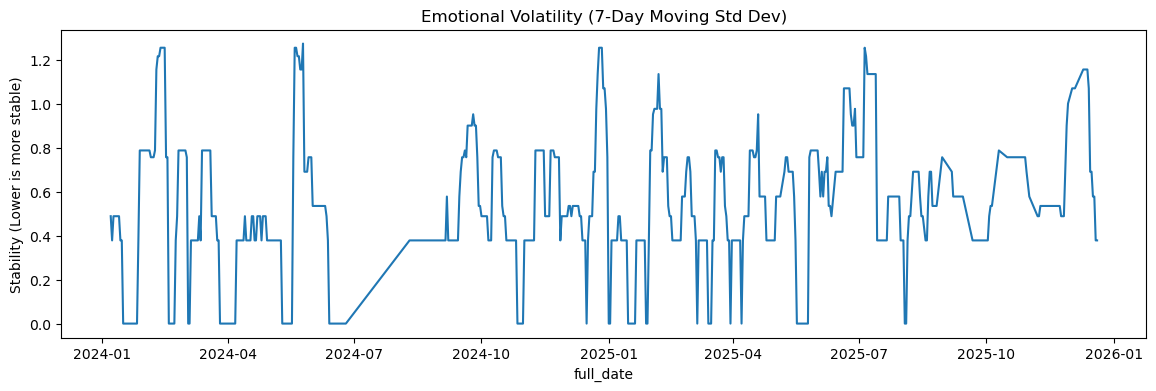

In [30]:
# Rolling window of 7 days
df['volatility'] = df['mood_numeric'].rolling(window=7).std()

plt.figure(figsize=(14, 4))
sns.lineplot(data=df, x='full_date', y='volatility')
plt.title("Emotional Volatility (7-Day Moving Std Dev)")
plt.ylabel("Stability (Lower is more stable)")

plt.show()

In [31]:
df['volatility'].describe()

count    539.000000
mean       0.521559
std        0.308458
min        0.000000
25%        0.377964
50%        0.487950
75%        0.755929
max        1.272418
Name: volatility, dtype: float64

Insight: Los picos altos indican semanas caóticas (subidas y bajadas bruscas), los valles indican semanas monótonas (siempre igual, sea bueno o malo).

### 3. "The Perfect Day"
¿Cómo se ve un día 'Increíble' en promedio?

In [33]:
# Filter only the best days
perfect_days = df[df['mood'] == 'Increíble']

print("Días increíbles: ", perfect_days.shape[0])

# Describe the numeric columns for these specific days
stats = perfect_days[[
    'activities_count', 'emotions_count', 'health_count', 'productivity_count', 'places_count',
    'tasks_count', 'school_count', 'positive_emotions_count', 'neutral_emotions_count', 'negative_emotions_count'
]].describe()
stats_o = perfect_days[['sleep_level']].describe()
print("\nNumber of activities & per category")
print(stats)
print(stats_o)

# Multi-hot, sum them to see prevalence
# Activities columns
activities_subset = perfect_days.iloc[:, 22:86]
top_activities = activities_subset.sum().sort_values(ascending=False)

print("\nTop best activities")
print(top_activities.head(15))

Días increíbles:  26

Number of activities & per category
       activities_count  emotions_count  health_count  productivity_count  \
count         26.000000       26.000000     26.000000           26.000000   
mean           8.038462        4.384615      1.115385            0.230769   
std            2.763777        1.298520      1.478565            0.710363   
min            2.000000        1.000000      0.000000            0.000000   
25%            6.250000        4.000000      0.000000            0.000000   
50%            8.000000        4.500000      0.000000            0.000000   
75%            9.000000        5.000000      2.000000            0.000000   
max           15.000000        7.000000      4.000000            3.000000   

       places_count  tasks_count  school_count  positive_emotions_count  \
count     26.000000    26.000000          26.0                26.000000   
mean       1.038462     0.076923           0.0                 3.576923   
std        0.823688    

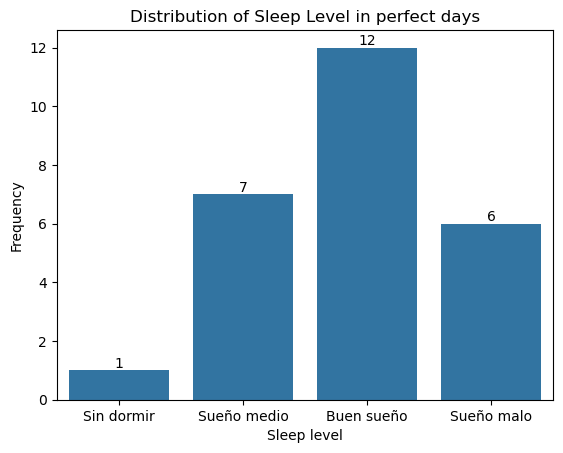

In [34]:
ax = sns.countplot(perfect_days, x="sleep_level")
ax.bar_label(ax.containers[0])

plt.xlabel('Sleep level')
plt.ylabel('Frequency') 
plt.title('Distribution of Sleep Level in perfect days')

plt.show()

### 4. Rachas
¿Cuál ha sido mi racha más larga de días buenos?

In [35]:
# Define "Good Day" as Mood >= 3 (Bien or Increíble)
condition = df['mood_numeric'] >= 3

# condition != condition.shift() detects changes
# cumsum() gives a unique ID to each "block" of days
# Group by that ID and count
streaks = df.groupby((condition != condition.shift()).cumsum()).cumcount() + 1

# Only keep the streaks where the condition was actually True
good_streaks = streaks[condition]

print(f"Longest streak of good days: {good_streaks.max()} days")
print(f"Average streak length: {good_streaks.mean():.2f} days")

Longest streak of good days: 25 days
Average streak length: 5.09 days


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 90 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   full_date                545 non-null    datetime64[ns]
 1   weekday                  545 non-null    object        
 2   time                     545 non-null    object        
 3   mood                     545 non-null    object        
 4   activities               545 non-null    object        
 5   mood_numeric             545 non-null    int64         
 6   month                    545 non-null    int64         
 7   year                     545 non-null    int64         
 8   weekday_numeric          545 non-null    int64         
 9   time_decimal             545 non-null    float64       
 10  sleep_level              545 non-null    object        
 11  sleep_level_numeric      545 non-null    int64         
 12  activities_count         545 non-nul